<a href="https://colab.research.google.com/github/Pallavisangral/imageclassification/blob/main/imageclassifcationprojects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dataset and libraries

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np

In [40]:
(xtrain, ytrain), (xtest,ytest) = datasets.cifar10.load_data()

EDA

In [41]:
xtrain.shape

(50000, 32, 32, 3)

In [42]:
xtest.shape

(10000, 32, 32, 3)

In [30]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
ytrain[0:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [43]:
ytrain = ytrain.reshape(-1,)

In [12]:
ytrain

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [33]:
ytrain.shape

(50000,)

In [44]:
ytest =ytest.reshape(-1,)

In [35]:
categories = ["airplane", "automobile", "bird", "cat", "deer","dog","frog","horse","ship","truck" ]

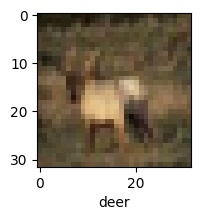

In [14]:
def sample(x,y,index):
   plt.figure(figsize = (15,2))
   plt.imshow(xtrain[index])
   plt.xlabel(categories[y[index]])
sample(xtrain,ytrain,3)

Normalizing data

In [38]:
xtrain = xtrain[0]/255.0
xtest = xtest[0]/255.0

using ann

In [45]:
ann = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])
ann.compile(optimizer="SGD",
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
ann.fit(xtrain,ytrain,batch_size=32, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 51ms/step - loss: nan - accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: nan - accuracy: 0.1000


In [46]:
ann.evaluate(xtest,ytest)

313/313 [==============================] - 8s 26ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
ypred =ann.predict(xtest)
ypredclasses = [np.argmax(element) for element in ypred]

print("classification report \n", classification_report(xtest,ypredclasses))

use cnn

In [51]:
cnn = models.Sequential([

    layers.Conv2D(filters =32, kernel_size =(3,3) , activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters =64, kernel_size =(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') #normalized value(output)
])
cnn.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
cnn.fit(xtrain,ytrain,batch_size=32, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 74s 46ms/step - loss: 2.5385 - accuracy: 0.2886
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4547 - accuracy: 0.4819
Epoch 3/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1857 - accuracy: 0.5855
Epoch 4/5
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9990 - accuracy: 0.6555
Epoch 5/5
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8227 - accuracy: 0.7184


In [53]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 4s 11ms/step - loss: 1.2157 - accuracy: 0.6097


[1.2156763076782227, 0.6097000241279602]

In [54]:
ypred =cnn.predict(xtest)

313/313 [==============================] - 4s 12ms/step


In [55]:
yclasses=[np.argmax(element) for element in ypred]
yclasses[:5]

[6, 8, 8, 0, 4]

In [56]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)